In [2]:
%reload_ext autoreload
%autoreload 2

import plot_utils as pu
import utils as ut
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'monospace'

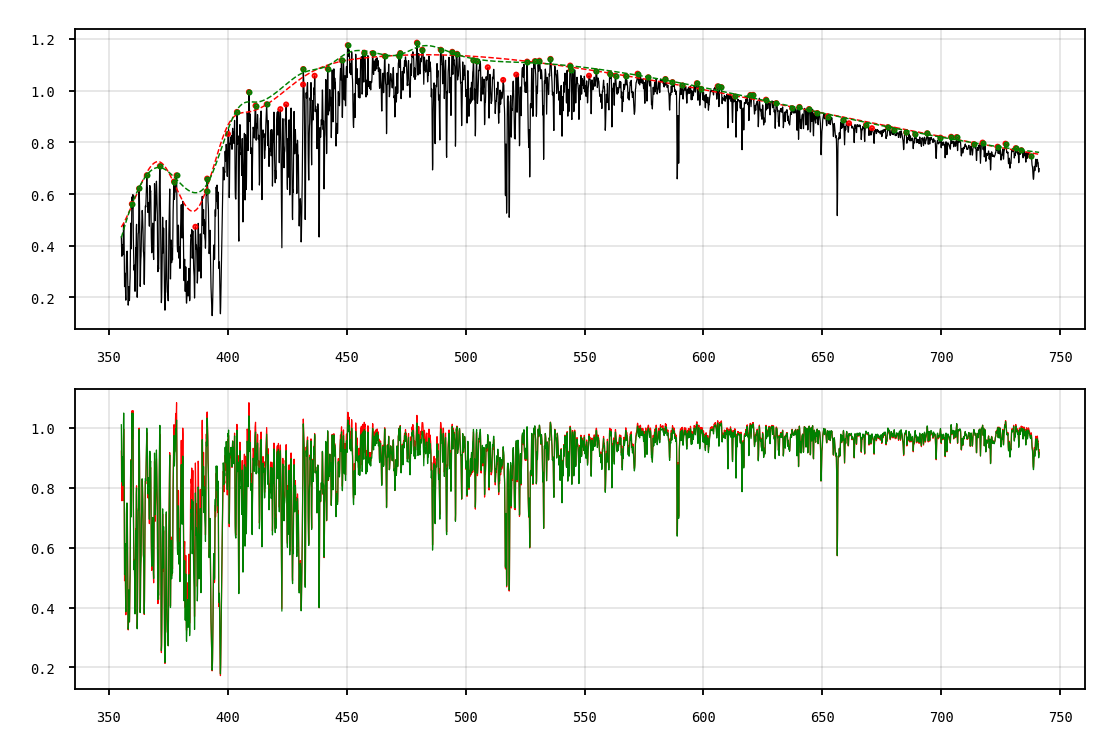

In [8]:
spectra_name = "starprob1"
fold = "../data/"
file = fold + spectra_name + ".dat"

df = pd.read_csv(file, sep="\s+", header=None)
x, y = df[0].values * 1e-1, df[1].values  # in nm and undetermined flux units

# windows = [(3000, 150), (None, 50)]
# s, std_fact = (0.1, 0.01), 1
windows = [(3000, 50), (None, 50)]
s, std_fact = (0.05, 0.01), 0.75


x, y = ut.dispose_zeros(x, y, clip=[20,-4])
y_cont, y_binmax = ut.get_continuum(x, y, windows=windows, smooth_factor=s, 
                                      return_maxs=True)
norm = y/y_cont

y_cont2, y_binmax2 = ut.get_continuum(x, y, windows=windows, smooth_factor=s, 
                return_maxs=True, envelope_std=std_fact)
norm2 = y/y_cont2
rat = 1.5
size = 720
fig_w, fig_h = size*rat, size
subplots = (2, 1)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, ratio=None, theme=None, subplots=subplots, text_size=0.75)
lw, ts, ss = 0.1, 1, 0.7
ax, ax1 = axs[0][0], axs[1][0]
ax.plot(x, y, c='k', lw=lw*fs, label='Data')

ax.plot(x, y_cont, c='r', lw=1.2*lw*fs, ls='--', label='Continuum')
ax.scatter(x, y_binmax, c='r', s=ss*lw*fs, ls='--', label='Bin maxima', zorder=2)

ax.plot(x, y_cont2, c='green', lw=1.2*lw*fs, ls='--', label='Continuum')
ax.scatter(x, y_binmax2, c='g', s=ss*lw*fs, label='Bin maxima', zorder=2)

ax1.plot(x, norm, c='red', lw=lw*fs, label='Normalized Data')
ax1.plot(x, norm2, c='green', lw=lw*fs, label='Normalized Data')

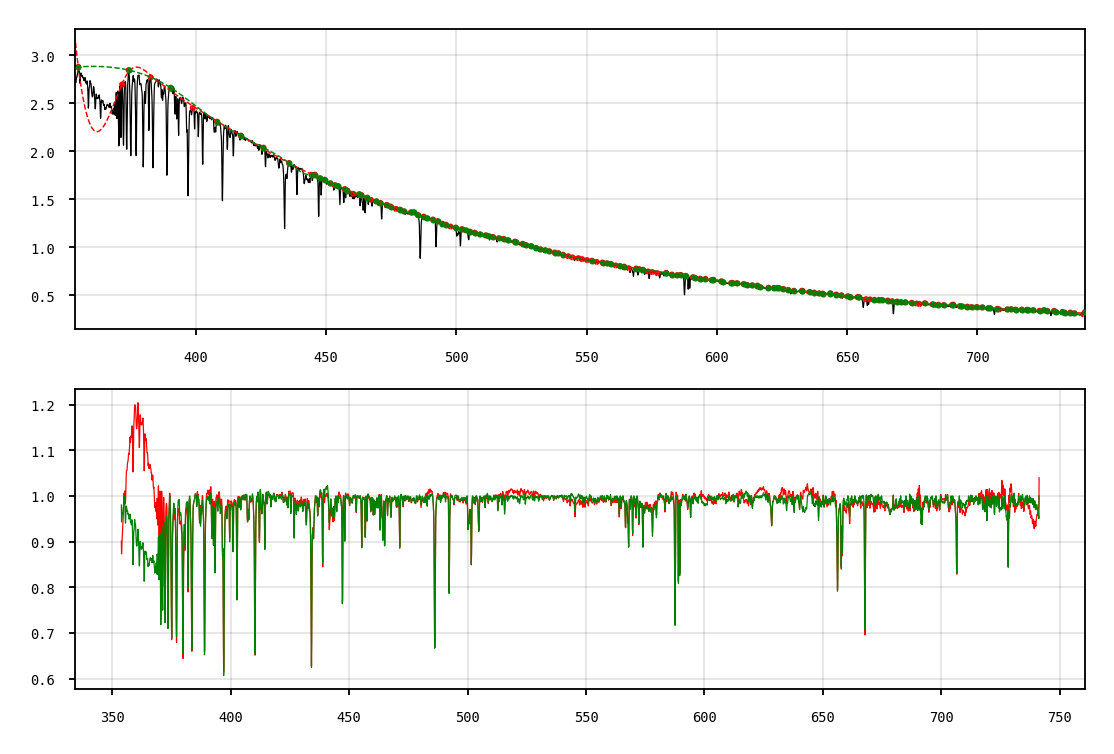

In [10]:
spectra_name = "starprob2"
fold = "../data/"
file = fold + spectra_name + ".dat"

df = pd.read_csv(file, sep="\s+", header=None)
x, y = df[0].values * 1e-1, df[1].values  # in nm and undetermined flux units

windows = [(1000,100), (None, 20)]
# s, std_fact = 0.05, 3
s, std_fact = (0.01, 0.0), 1

x, y = ut.dispose_zeros(x, y, clip=[4,-5])
y_cont, y_binmax = ut.get_continuum(x, y, windows=windows, smooth_factor=s, 
                                      return_maxs=True)
norm = y/y_cont

y_cont2, y_binmax2 = ut.get_continuum(x, y, windows=windows, smooth_factor=s, 
                return_maxs=True, envelope_std=std_fact)
norm2 = y/y_cont2
rat = 1.5
size = 720
fig_w, fig_h = size*rat, size
subplots = (2, 1)
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h, ratio=None, theme=None, subplots=subplots, text_size=0.75)
lw, ts, ss = 0.1, 1, 0.7
ax, ax1 = axs[0][0], axs[1][0]
ax.plot(x, y, c='k', lw=lw*fs, label='Data')

ax.plot(x, y_cont, c='r', lw=1.2*lw*fs, ls='--', label='Continuum')
ax.scatter(x, y_binmax, c='r', s=ss*lw*fs, ls='--', label='Bin maxima', zorder=2)

ax.plot(x, y_cont2, c='green', lw=1.2*lw*fs, ls='--', label='Continuum')
ax.scatter(x, y_binmax2, c='g', s=ss*lw*fs, label='Bin maxima', zorder=3)

ax1.plot(x, norm, c='red', lw=lw*fs, label='Normalized Data')
ax1.plot(x, norm2, c='green', lw=lw*fs, label='Normalized Data')

for ax_ in [ax, ax1]:
    ax.set_xlim(x[0], x[-1])
    # ax_.set_xlim(550, 600)